In [1]:
import pandas as pd

In [2]:
data = pd.read_csv('HW_train_main_data.csv')
add_data = pd.read_csv('HW_train_additional_data.csv')
test = pd.read_csv('HW_test_main_data.csv')
add_test = pd.read_csv('HW_test_additional_data.csv')

Посмотрим на данные

In [3]:
full_data = pd.merge(data, add_data, left_index=True, right_index=True, how='inner')
full_test = pd.merge(test, add_test, left_index=True, right_index=True, how='inner')

In [4]:
full_data.isna().sum()

id_x                                   0
timestamp                              0
full_sq                                0
life_sq                             6065
floor                                157
max_floor                           9113
material                            9113
build_year                         12941
num_room                            9113
kitch_sq                            9113
apartment condition                12912
sub_area                               0
price                                  0
id_y                                   0
population                             0
indust_part                            0
preschool_facilities                   0
school_facilities                      0
hospital_beds_raion                13747
healthcare_facilities                  0
university_num                         0
sport_objects_facilities               0
additional_education_facilities        0
culture_objects_facilities             0
shopping_centers

In [5]:
data.describe()

,id,full_sq,life_sq,floor,max_floor,material,build_year,num_room,kitch_sq,apartment condition,sub_area,price
count,29000.000000,29000.000000,22935.000000,28843.000000,19887.000000,19887.000000,1.605900e+04,19887.000000,19887.000000,16088.000000,29000.000000,2.900000e+04
mean,54932.809724,55.235345,34.103248,7.665326,12.560567,1.821491,3.126422e+03,1.908282,6.424297,2.108031,76.503931,7.472051e+06
std,25981.968682,38.781299,20.911329,5.319891,6.775449,1.475440,1.582194e+05,0.853043,28.960510,0.882274,39.308253,5.056736e+06
min,10001.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000e+00,0.000000,0.000000,1.000000,0.000000,1.085000e+05
25%,32382.500000,40.000000,20.000000,3.000000,9.000000,1.000000,1.966000e+03,1.000000,1.000000,1.000000,44.000000,4.957875e+06
50%,54984.500000,50.000000,30.000000,6.000000,12.000000,1.000000,1.979000e+03,2.000000,6.000000,2.000000,78.000000,6.553400e+06
75%,77417.500000,64.000000,43.000000,11.000000,17.000000,2.000000,2.005000e+03,2.000000,9.000000,3.000000,105.000000,8.674925e+06
max,99999.000000,5329.000000,802.000000,77.000000,117.000000,6.000000,2.005201e+07,19.000000,2014.000000,33.000000,145.000000,1.124444e+08


In [6]:
data.head()

,id,timestamp,full_sq,life_sq,floor,max_floor,material,build_year,num_room,kitch_sq,apartment condition,sub_area,price
0,30392,2014-12-30,60,36.0,6.0,9.0,1.0,1974.0,3.0,5.0,3.0,9,9711800.0
1,36540,2013-06-28,44,29.0,9.0,NaN,NaN,NaN,NaN,NaN,NaN,19,6643200.0
2,94669,2013-09-15,62,60.0,4.0,NaN,NaN,NaN,NaN,NaN,NaN,80,5698300.0
3,17531,2013-12-13,33,18.0,4.0,9.0,1.0,1970.0,1.0,6.0,2.0,15,5055000.0
4,32159,2014-02-13,37,14.0,1.0,17.0,1.0,1991.0,1.0,1.0,2.0,74,5425000.0


In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29000 entries, 0 to 28999
Data columns (total 13 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   id                   29000 non-null  int64  
 1   timestamp            29000 non-null  object 
 2   full_sq              29000 non-null  int64  
 3   life_sq              22935 non-null  float64
 4   floor                28843 non-null  float64
 5   max_floor            19887 non-null  float64
 6   material             19887 non-null  float64
 7   build_year           16059 non-null  float64
 8   num_room             19887 non-null  float64
 9   kitch_sq             19887 non-null  float64
 10  apartment condition  16088 non-null  float64
 11  sub_area             29000 non-null  int64  
 12  price                29000 non-null  float64
dtypes: float64(9), int64(3), object(1)
memory usage: 2.9+ MB


<AxesSubplot:>

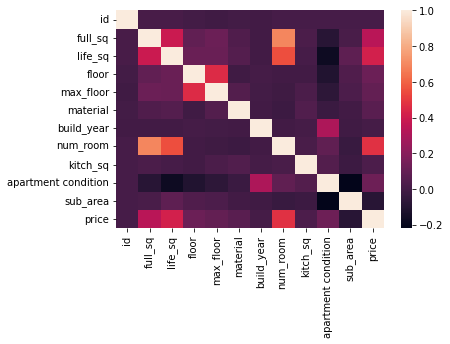

In [8]:
import seaborn as sns
import matplotlib.pyplot as plt
corr = data.corr()
sns.heatmap(corr,
            xticklabels=corr.columns.values,
            yticklabels=corr.columns.values)

Заметна коррелляция между ценой и количеством комнат, life_sq, full_sq и ценой

C:\Users\ALLA\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='life_sq', ylabel='Density'>

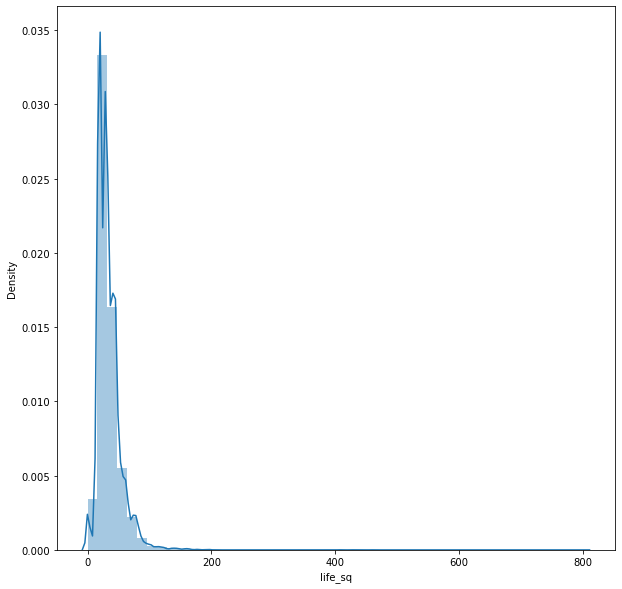

In [9]:
plt.figure(figsize = (10,10))
sns.distplot(data['life_sq'])

Рапределение life_sq имеет тяжелый правый хвост

C:\Users\ALLA\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='floor', ylabel='Density'>

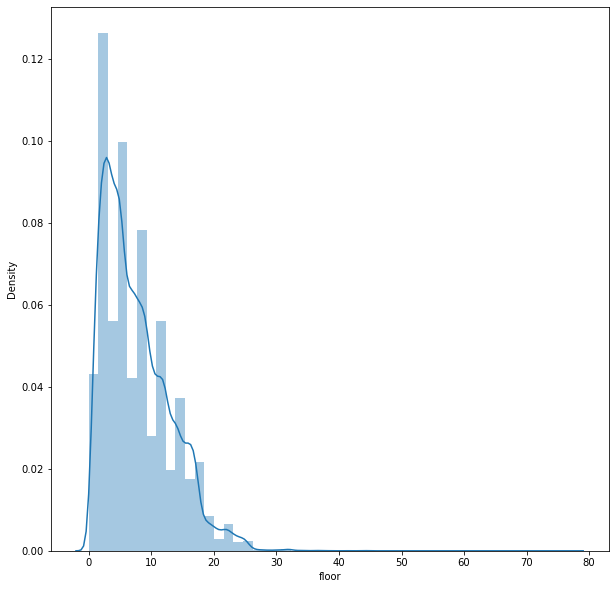

In [10]:
plt.figure(figsize = (10,10))
sns.distplot(data['floor'])

C:\Users\ALLA\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='material', ylabel='Density'>

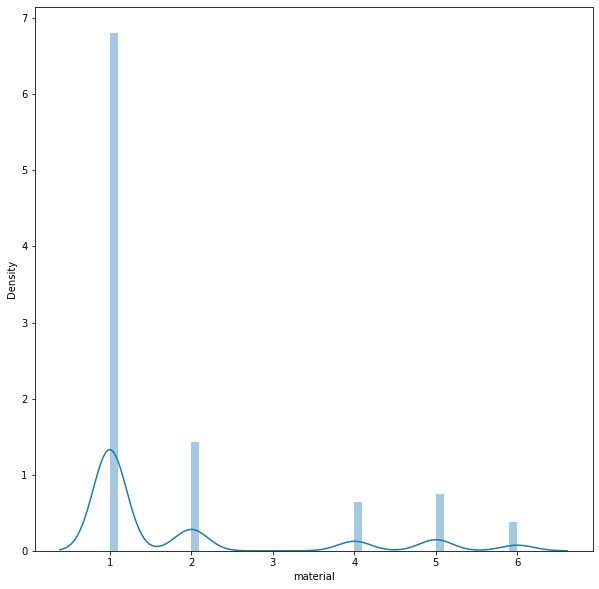

In [11]:
plt.figure(figsize = (10,10))
sns.distplot(data['material'])

C:\Users\ALLA\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='num_room', ylabel='Density'>

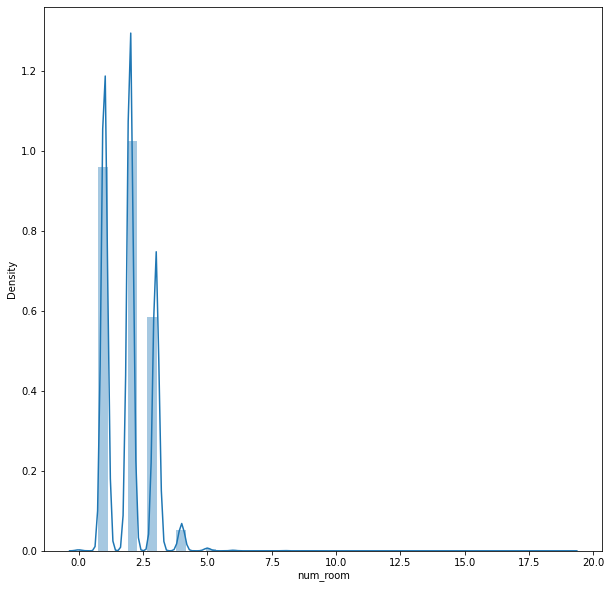

In [12]:
plt.figure(figsize = (10,10))
sns.distplot(data['num_room'])

C:\Users\ALLA\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='price', ylabel='Density'>

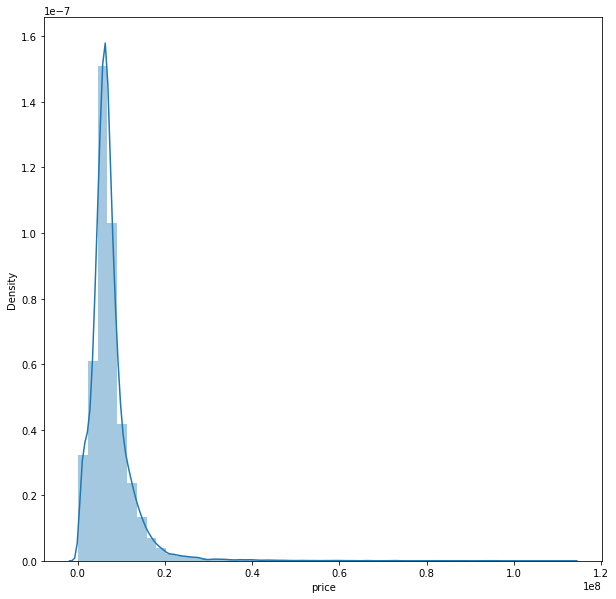

In [13]:
plt.figure(figsize = (10,10))
sns.distplot(data['price'])

Посмотрим на пропуски

In [14]:
data.isna().sum()

id                         0
timestamp                  0
full_sq                    0
life_sq                 6065
floor                    157
max_floor               9113
material                9113
build_year             12941
num_room                9113
kitch_sq                9113
apartment condition    12912
sub_area                   0
price                      0
dtype: int64

ОЧень много пропущенных значений в столбцах apartment_condition и build_year. Исследуем, это происходит случайно или систематически

In [15]:
data.groupby(data['apartment condition'].isnull()).mean()

,id,full_sq,life_sq,floor,max_floor,material,build_year,num_room,kitch_sq,apartment condition,sub_area,price
apartment condition,,,,,,,,,,,,
False,54685.611450,54.906949,33.907049,7.327946,12.628854,1.877113,3270.835983,1.924851,7.123073,2.108031,73.861574,8.007765e+06
True,55240.812035,55.644517,34.438630,8.090866,12.271387,1.585944,1755.059477,1.838115,3.465122,NaN,79.796236,6.804567e+06


In [16]:
data.groupby(data['apartment condition'].isnull()).max()

,id,timestamp,full_sq,life_sq,floor,max_floor,material,build_year,num_room,kitch_sq,apartment condition,sub_area,price
apartment condition,,,,,,,,,,,,,
False,99997,2015-07-31,639,637.0,77.0,117.0,6.0,20052009.0,19.0,2014.0,33.0,145,94932200.0
True,99999,2015-07-31,5329,802.0,44.0,99.0,6.0,2017.0,6.0,63.0,NaN,145,112444400.0


Заметим, что в build_year есть выбросы, скорее всего склеились два года

In [17]:
data.groupby(data['build_year'].isnull()).mean()

,id,full_sq,life_sq,floor,max_floor,material,build_year,num_room,kitch_sq,apartment condition,sub_area,price
build_year,,,,,,,,,,,,
False,54856.420885,54.487328,33.735523,7.159163,12.398530,1.898126,3126.42238,1.938352,7.425182,2.219492,72.349088,8.084645e+06
True,55027.603663,56.163589,34.842610,8.301158,13.240334,1.500000,NaN,1.782132,2.225444,1.069275,81.659841,6.711860e+06


In [18]:
num_features = ['id', 'full_sq', 'life_sq', 'floor',
            'max_floor', 'material', 'build_year',
            'num_room', 'kitch_sq', 'apartment condition','sub_area','day', 'month', 'year']
target = ['price']

In [19]:
from datetime import date, datetime
data = full_data
test = full_test
data['delta_days'] = data['timestamp'].apply(lambda x: (date.today() - datetime.strptime(x, '%Y-%m-%d').date()).days)
data['day'] = data['timestamp'].apply(lambda x: datetime.strptime(x, '%Y-%m-%d').date().day)
data['month'] = data['timestamp'].apply(lambda x: datetime.strptime(x, '%Y-%m-%d').date().month)
data['year'] = data['timestamp'].apply(lambda x: datetime.strptime(x, '%Y-%m-%d').date().year)

test['delta_days'] = test['timestamp'].apply(lambda x: (date.today() - datetime.strptime(x, '%Y-%m-%d').date()).days)
test['day'] = test['timestamp'].apply(lambda x: datetime.strptime(x, '%Y-%m-%d').date().day)
test['month'] = test['timestamp'].apply(lambda x: datetime.strptime(x, '%Y-%m-%d').date().month)
test['year'] = test['timestamp'].apply(lambda x: datetime.strptime(x, '%Y-%m-%d').date().year)



In [20]:
data.drop('timestamp', axis=1, inplace=True)
test.drop('timestamp', axis=1, inplace=True)

In [21]:
pip install fancyimpute

Note: you may need to restart the kernel to use updated packages.


Заполним пропуски с помощью KNN

In [22]:
from fancyimpute import KNN
from sklearn.impute import KNNImputer
from fancyimpute import SoftImpute
import numpy as np



In [23]:
from sklearn.impute import KNNImputer
from sklearn.preprocessing import StandardScaler

knn = data.copy()
 
# создадим объект класса StandardScaler
scaler = StandardScaler()
 
# масштабируем данные и сразу преобразуем их обратно в датафрейм
knn = pd.DataFrame(scaler.fit_transform(knn), columns = knn.columns)

knn_imputer = KNNImputer(n_neighbors = 5, weights = 'uniform')
 
# заполним пропуски в столбце Age
knn = pd.DataFrame(knn_imputer.fit_transform(knn), columns = knn.columns)

# проверим отсутствие пропусков и размеры получившегося датафрейма

knn = pd.DataFrame(scaler.inverse_transform(knn), columns = knn.columns)
# округлим значение возраста

 
# посмотрим на результат
knn.head(7)

,id_x,full_sq,life_sq,floor,max_floor,material,build_year,num_room,kitch_sq,apartment condition,...,green_part,prom_part,cafe_count,church_facilities,mosque,leisure_facilities,delta_days,day,month,year
0,30392.0,60.0,36.0,6.0,9.0,1.0,1974.0,3.0,5.0,3.0,...,2.86,0.00,0.0,0.0,0.0,0.0,3067.0,30.0,12.0,2014.0
1,36540.0,44.0,29.0,9.0,11.6,1.0,1975.2,1.6,6.8,2.4,...,9.26,2.71,1.0,0.0,0.0,0.0,3617.0,28.0,6.0,2013.0
2,94669.0,62.0,60.0,4.0,13.6,1.0,1985.6,2.6,5.8,2.6,...,13.80,0.00,4.0,0.0,0.0,0.0,3538.0,15.0,9.0,2013.0
3,17531.0,33.0,18.0,4.0,9.0,1.0,1970.0,1.0,6.0,2.0,...,7.46,0.00,1.0,0.0,0.0,0.0,3449.0,13.0,12.0,2013.0
4,32159.0,37.0,14.0,1.0,17.0,1.0,1991.0,1.0,1.0,2.0,...,0.00,0.00,3.0,0.0,0.0,0.0,3387.0,13.0,2.0,2014.0
5,63050.0,44.0,1.0,10.0,25.0,2.0,2014.0,1.0,1.0,1.0,...,12.24,0.00,71.0,15.0,0.0,0.0,3303.0,8.0,5.0,2014.0
6,82217.0,58.0,63.0,13.0,23.4,2.2,403.0,1.4,0.8,1.4,...,21.17,14.29,0.0,0.0,0.0,0.0,3782.0,14.0,1.0,2013.0


In [24]:
test = pd.DataFrame(scaler.fit_transform(test), columns = test.columns)
test = pd.DataFrame(knn_imputer.fit_transform(test), columns = test.columns)
test = pd.DataFrame(scaler.inverse_transform(test), columns = test.columns)

In [25]:
fill_data = knn

In [26]:
from fancyimpute import SoftImpute
from sklearn.impute import KNNImputer

class SoftImputeDf(SoftImpute):
    """DataFrame Wrapper around SoftImpute"""

    def __init__(self, shrinkage_value=None, convergence_threshold=0.001,
                 max_iters=100,max_rank=None,n_power_iterations=1,init_fill_method="zero",
                 min_value=None,max_value=None,normalizer=None,verbose=True):

        super(SoftImputeDf, self).__init__(shrinkage_value=shrinkage_value, 
                                           convergence_threshold=convergence_threshold,
                                           max_iters=max_iters,max_rank=max_rank,
                                           n_power_iterations=n_power_iterations,
                                           init_fill_method=init_fill_method,
                                           min_value=min_value,max_value=max_value,
                                           normalizer=normalizer,verbose=False)



    def fit_transform(self, X, y=None):

        assert isinstance(X, pd.DataFrame), "Must be pandas dframe"

        for col in X.columns:
            if X[col].isnull().sum() < 10:
                X[col].fillna(0.0, inplace=True)

        z = super(SoftImputeDf, self).fit_transform(X.values)
        return pd.DataFrame(z, index=X.index, columns=X.columns)
imputer = SoftImputeDf()
fill_data = imputer.fit_transform(data)
test = imputer.fit_transform(test)

C:\Users\ALLA\anaconda3\lib\site-packages\fancyimpute\solver.py:55: UserWarning: Input matrix is not missing any values
  warnings.warn("Input matrix is not missing any values")


Исправим неверные значения build_year

In [27]:
def change_year(data):
  out = data.copy()
  out['year'] = out['year'].apply(lambda x: x if x <= 2023 else x.median())
  return out


In [28]:
change_year(fill_data)
change_year(test)


,id_x,full_sq,life_sq,floor,max_floor,material,build_year,num_room,kitch_sq,apartment condition,...,green_part,prom_part,cafe_count,church_facilities,mosque,leisure_facilities,delta_days,day,month,year
0,30307.0,74.0,43.0,13.0,14.0,1.0,1996.0,3.0,10.0,2.0,...,12.16,0.00,5.0,-5.551115e-17,0.0,0.0,3321.0,20.0,4.0,2014.0
1,87380.0,29.0,30.2,6.0,17.0,1.0,2007.0,1.0,1.0,1.0,...,15.45,2.78,0.0,-5.551115e-17,0.0,0.0,3049.0,17.0,1.0,2015.0
2,12874.0,80.0,1548.0,8.0,17.0,1.0,2014.4,3.0,1.0,1.0,...,15.29,2.83,1.0,-5.551115e-17,0.0,0.0,3242.0,8.0,7.0,2014.0
3,57688.0,53.0,27.4,4.0,13.6,1.0,1982.4,1.6,6.8,2.2,...,13.80,0.00,4.0,-5.551115e-17,0.0,0.0,3781.0,15.0,1.0,2013.0
4,43433.0,36.0,19.0,16.0,12.4,2.8,1981.6,2.0,6.2,2.8,...,0.01,0.00,4.0,1.000000e+00,0.0,0.0,3995.0,15.0,6.0,2012.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,28684.0,54.0,51.8,2.0,17.0,1.0,1601.0,2.0,1.0,1.0,...,0.00,0.00,0.0,-5.551115e-17,0.0,0.0,2971.0,5.0,4.0,2015.0
996,65212.0,78.0,45.0,5.0,10.0,1.0,1995.0,3.0,10.0,2.0,...,13.84,0.00,6.0,-5.551115e-17,0.0,0.0,3289.0,22.0,5.0,2014.0
997,11218.0,2.0,1.0,26.0,1.0,1.0,1.0,1.0,1.0,1.0,...,2.07,20.49,3.0,-5.551115e-17,0.0,0.0,3079.0,18.0,12.0,2014.0
998,57238.0,55.0,33.0,6.0,12.0,1.8,1978.0,1.8,6.8,2.2,...,17.62,0.00,4.0,-5.551115e-17,0.0,0.0,3636.0,9.0,6.0,2013.0


In [29]:
fill_data['material'] = fill_data['material'].apply(lambda x: int(x))
test['material'] = test['material'].apply(lambda x: int(x))

In [30]:
fill_data.describe()

,id_x,full_sq,life_sq,floor,max_floor,material,build_year,num_room,kitch_sq,apartment condition,...,green_part,prom_part,cafe_count,church_facilities,mosque,leisure_facilities,delta_days,day,month,year
count,29000.000000,29000.000000,29000.000000,29000.000000,29000.000000,29000.000000,2.900000e+04,29000.000000,29000.000000,29000.000000,...,29000.000000,29000.000000,29000.000000,29000.000000,29000.000000,29000.000000,29000.000000,29000.000000,29000.000000,29000.000000
mean,54932.809724,55.235345,31.763406,7.648343,10.970095,1.429379,2.554024e+03,1.704080,5.668511,1.727964,...,13.337734,5.717121,3.895103,0.588172,0.005069,0.069862,3422.437655,15.667862,6.669828,2013.510414
std,25981.968682,38.781299,20.354129,5.315141,6.754587,1.431486,1.177421e+05,0.912607,24.059673,0.974706,...,15.986055,11.520025,11.358709,2.178019,0.071017,0.385272,337.542697,8.789069,3.536714,0.971664
min,10001.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000,0.000000,0.037118,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2854.000000,1.000000,1.000000,2011.000000
25%,32382.500000,40.000000,19.000000,3.000000,5.601282,1.000000,1.628587e+03,1.000000,2.128360,1.000000,...,1.480000,0.000000,0.000000,0.000000,0.000000,0.000000,3146.000000,8.000000,4.000000,2013.000000
50%,54984.500000,50.000000,28.000000,6.000000,9.000000,1.000000,1.970000e+03,1.549470,5.000000,1.461439,...,8.365000,0.000000,1.000000,0.000000,0.000000,0.000000,3362.000000,16.000000,6.000000,2014.000000
75%,77417.500000,64.000000,39.042632,11.000000,17.000000,1.000000,2.007000e+03,2.000000,8.000000,2.000000,...,19.920000,5.760000,3.000000,0.000000,0.000000,0.000000,3662.000000,23.000000,10.000000,2014.000000
max,99999.000000,5329.000000,802.000000,77.000000,126.048468,18.000000,2.005201e+07,21.152288,2014.000000,33.000000,...,100.000000,98.770000,120.000000,17.000000,1.000000,9.000000,4278.000000,31.000000,12.000000,2015.000000


Для решения задачи будем использовать CatBoost

In [31]:

!pip install catboost
import catboost
from catboost import *


ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
smart-app-framework 2.0.0 requires python-dateutil==2.7.3, but you have python-dateutil 2.8.2 which is incompatible.
cmdstanpy 1.0.4 requires numpy>=1.21, but you have numpy 1.19.3 which is incompatible.
sys:1: ResourceWarning: unclosed socket <zmq.Socket(zmq.PUSH) at 0x26256c488e0>
sys:1: ResourceWarning: unclosed socket <zmq.Socket(zmq.PUSH) at 0x26256c48b80>
C:\Users\ALLA\anaconda3\lib\site-packages\IPython\utils\_process_win32.py:124: ResourceWarning: unclosed file <_io.BufferedWriter name=5>
  return process_handler(cmd, _system_body)
C:\Users\ALLA\anaconda3\lib\site-packages\IPython\utils\_process_win32.py:124: ResourceWarning: unclosed file <_io.BufferedReader name=6>
  return process_handler(cmd, _system_body)
C:\Users\ALLA\anaconda3\lib\site-packages\IPython\utils\_process_win32.py:124: ResourceWarning: u

  Using cached python_dateutil-2.8.2-py2.py3-none-any.whl (247 kB)
  Attempting uninstall: python-dateutil
    Found existing installation: python-dateutil 2.7.3
    Uninstalling python-dateutil-2.7.3:
      Successfully uninstalled python-dateutil-2.7.3


In [32]:
train, validate, test_data = \
              np.split(fill_data.sample(frac=1, random_state=42),
                       [int(.6*len(fill_data)), int(.8*len(fill_data))])
              

In [33]:
X_train = train.drop('price', axis = 1)
y_train = train['price']

X_validate = train.drop('price', axis = 1)
y_validate = train['price']

X_test = test_data.drop('price', axis = 1)
y_test = test_data['price']

In [34]:

#train_pool = Pool(train.drop(['price', 'id_x'], 1),
#                  label=train.price.values,
#                  cat_features = ['material'])
#
#val_pool = Pool(validate.drop(['price', 'id_x'], 1),
#                label=validate.price.values,
#                cat_features = ['material'])
#
#test_pool = Pool(test_data.drop(['price', 'id_x'], 1),
#                 label=test_data.price.values,
#                 cat_features = ['material'])
  
SAMPLE_RATE = 0.4
RANDOM_SEED = 1
EARLY_STOPPING_ROUND = 100

In [35]:
from sklearn.metrics import mean_squared_error
from tqdm.auto import tqdm
def objective(trial):
    param = {}
    param['learning_rate'] = trial.suggest_discrete_uniform("learning_rate", 0.001, 0.02, 0.001)
    param['depth'] = trial.suggest_int('depth', 9, 15)
    param['l2_leaf_reg'] = trial.suggest_discrete_uniform('l2_leaf_reg', 1.0, 5.5, 0.5)
    param['min_child_samples'] = trial.suggest_categorical('min_child_samples', [1, 4, 8, 16, 32])
    param['grow_policy'] = 'Depthwise'
    param['iterations'] = 1000
    param['use_best_model'] = True
    param['eval_metric'] = 'RMSE'
    param['od_type'] = 'iter'
    param['od_wait'] = 20
    param['random_state'] = RANDOM_SEED
    param['logging_level'] = 'Silent'
    
    regressor = CatBoostRegressor(**param)

    regressor.fit(X_train.copy(), y_train.copy(),
                  eval_set=[(X_validate.copy(), y_validate.copy())],
                  early_stopping_rounds=EARLY_STOPPING_ROUND)
    loss = mean_squared_error(y_test, regressor.predict(X_test.copy()))
    return loss
    

In [36]:
!pip install plotly
!pip install ipywidgets
!jupyter nbextension enable --py widgetsnbextension

C:\Users\ALLA\anaconda3\lib\threading.py:914: ResourceWarning: unclosed file <_io.BufferedWriter name=5>
  del self._target, self._args, self._kwargs
C:\Users\ALLA\anaconda3\lib\threading.py:914: ResourceWarning: unclosed file <_io.BufferedReader name=6>
  del self._target, self._args, self._kwargs
C:\Users\ALLA\anaconda3\lib\threading.py:914: ResourceWarning: unclosed file <_io.BufferedReader name=7>
  del self._target, self._args, self._kwargs
sys:1: ResourceWarning: unclosed socket <zmq.Socket(zmq.PUSH) at 0x2627abd2f40>


sys:1: ResourceWarning: unclosed socket <zmq.Socket(zmq.PUSH) at 0x2627abd25e0>
C:\Users\ALLA\anaconda3\lib\site-packages\IPython\utils\_process_win32.py:124: ResourceWarning: unclosed file <_io.BufferedWriter name=9>
  return process_handler(cmd, _system_body)
C:\Users\ALLA\anaconda3\lib\site-packages\IPython\utils\_process_win32.py:124: ResourceWarning: unclosed file <_io.BufferedReader name=10>
  return process_handler(cmd, _system_body)
C:\Users\ALLA\anaconda3\lib\site-packages\IPython\utils\_process_win32.py:124: ResourceWarning: unclosed file <_io.BufferedReader name=11>
  return process_handler(cmd, _system_body)
Enabling notebook extension jupyter-js-widgets/extension...
      - Validating: ok
sys:1: ResourceWarning: unclosed socket <zmq.Socket(zmq.PUSH) at 0x2627b685f40>
C:\Users\ALLA\anaconda3\lib\site-packages\IPython\utils\_process_win32.py:124: ResourceWarning: unclosed file <_io.BufferedWriter name=5>
  return process_handler(cmd, _system_body)
C:\Users\ALLA\anaconda3\lib

In [37]:
from catboost import Pool
train_pool = Pool(X_train, y_train)
test_pool = Pool(X_validate, y_validate)

In [42]:
!pip install optuna

C:\Users\ALLA\anaconda3\lib\threading.py:914: ResourceWarning: unclosed file <_io.BufferedWriter name=5>
  del self._target, self._args, self._kwargs
C:\Users\ALLA\anaconda3\lib\threading.py:914: ResourceWarning: unclosed file <_io.BufferedReader name=6>
  del self._target, self._args, self._kwargs
C:\Users\ALLA\anaconda3\lib\threading.py:914: ResourceWarning: unclosed file <_io.BufferedReader name=7>
  del self._target, self._args, self._kwargs



  Using cached Mako-1.2.4-py3-none-any.whl (78 kB)


sys:1: ResourceWarning: unclosed socket <zmq.Socket(zmq.PUSH) at 0x264afaefe20>


In [43]:
import optuna

In [54]:
study = optuna.create_study(study_name=f'catboost-seed{RANDOM_SEED}')
study.optimize(objective, n_trials=50, n_jobs=-1, timeout=24000,show_progress_bar=True)

[I 2023-05-24 17:03:21,444] A new study created in memory with name: catboost-seed1
C:\Users\ALLA\anaconda3\lib\site-packages\optuna\progress_bar.py:56: ExperimentalWarning: Progress bar is experimental (supported from v1.2.0). The interface can change in the future.
  self._init_valid()


  0%|          | 0/50 [00:00<?, ?it/s]

C:\Users\ALLA\AppData\Local\Temp\ipykernel_1500\928650788.py:5: FutureWarning: suggest_discrete_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
  param['learning_rate'] = trial.suggest_discrete_uniform("learning_rate", 0.001, 0.02, 0.001)
C:\Users\ALLA\AppData\Local\Temp\ipykernel_1500\928650788.py:5: FutureWarning: suggest_discrete_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
  param['learning_rate'] = trial.suggest_discrete_uniform("learning_rate", 0.001, 0.02, 0.001)
C:\Users\ALLA\AppData\Local\Temp\ipykernel_1500\928650788.py:7: FutureWarning: suggest_discrete_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. U

[I 2023-05-24 17:06:35,406] Trial 0 finished with value: 6864896256220.743 and parameters: {'learning_rate': 0.004, 'depth': 9, 'l2_leaf_reg': 5.5, 'min_child_samples': 8}. Best is trial 0 with value: 6864896256220.743.


C:\Users\ALLA\AppData\Local\Temp\ipykernel_1500\928650788.py:5: FutureWarning: suggest_discrete_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
  param['learning_rate'] = trial.suggest_discrete_uniform("learning_rate", 0.001, 0.02, 0.001)
C:\Users\ALLA\AppData\Local\Temp\ipykernel_1500\928650788.py:7: FutureWarning: suggest_discrete_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
  param['l2_leaf_reg'] = trial.suggest_discrete_uniform('l2_leaf_reg', 1.0, 5.5, 0.5)


[I 2023-05-24 17:08:25,717] Trial 2 finished with value: 6660200089989.25 and parameters: {'learning_rate': 0.006, 'depth': 9, 'l2_leaf_reg': 3.5, 'min_child_samples': 1}. Best is trial 2 with value: 6660200089989.25.


C:\Users\ALLA\AppData\Local\Temp\ipykernel_1500\928650788.py:5: FutureWarning: suggest_discrete_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
  param['learning_rate'] = trial.suggest_discrete_uniform("learning_rate", 0.001, 0.02, 0.001)
C:\Users\ALLA\AppData\Local\Temp\ipykernel_1500\928650788.py:7: FutureWarning: suggest_discrete_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
  param['l2_leaf_reg'] = trial.suggest_discrete_uniform('l2_leaf_reg', 1.0, 5.5, 0.5)


[I 2023-05-24 17:08:42,217] Trial 4 finished with value: 4487554013866.477 and parameters: {'learning_rate': 0.014000000000000002, 'depth': 9, 'l2_leaf_reg': 4.5, 'min_child_samples': 32}. Best is trial 4 with value: 4487554013866.477.


C:\Users\ALLA\AppData\Local\Temp\ipykernel_1500\928650788.py:5: FutureWarning: suggest_discrete_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
  param['learning_rate'] = trial.suggest_discrete_uniform("learning_rate", 0.001, 0.02, 0.001)
C:\Users\ALLA\AppData\Local\Temp\ipykernel_1500\928650788.py:7: FutureWarning: suggest_discrete_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
  param['l2_leaf_reg'] = trial.suggest_discrete_uniform('l2_leaf_reg', 1.0, 5.5, 0.5)


[I 2023-05-24 17:16:48,359] Trial 5 finished with value: 5072239544946.198 and parameters: {'learning_rate': 0.017, 'depth': 12, 'l2_leaf_reg': 3.0, 'min_child_samples': 4}. Best is trial 4 with value: 4487554013866.477.


C:\Users\ALLA\AppData\Local\Temp\ipykernel_1500\928650788.py:5: FutureWarning: suggest_discrete_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
  param['learning_rate'] = trial.suggest_discrete_uniform("learning_rate", 0.001, 0.02, 0.001)
C:\Users\ALLA\AppData\Local\Temp\ipykernel_1500\928650788.py:7: FutureWarning: suggest_discrete_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
  param['l2_leaf_reg'] = trial.suggest_discrete_uniform('l2_leaf_reg', 1.0, 5.5, 0.5)


[I 2023-05-24 17:17:04,736] Trial 3 finished with value: 5415067463269.739 and parameters: {'learning_rate': 0.010000000000000002, 'depth': 14, 'l2_leaf_reg': 3.5, 'min_child_samples': 4}. Best is trial 4 with value: 4487554013866.477.


C:\Users\ALLA\AppData\Local\Temp\ipykernel_1500\928650788.py:5: FutureWarning: suggest_discrete_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
  param['learning_rate'] = trial.suggest_discrete_uniform("learning_rate", 0.001, 0.02, 0.001)
C:\Users\ALLA\AppData\Local\Temp\ipykernel_1500\928650788.py:7: FutureWarning: suggest_discrete_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
  param['l2_leaf_reg'] = trial.suggest_discrete_uniform('l2_leaf_reg', 1.0, 5.5, 0.5)


[I 2023-05-24 17:19:40,915] Trial 6 finished with value: 5311439690951.371 and parameters: {'learning_rate': 0.016, 'depth': 12, 'l2_leaf_reg': 1.5, 'min_child_samples': 4}. Best is trial 4 with value: 4487554013866.477.


C:\Users\ALLA\AppData\Local\Temp\ipykernel_1500\928650788.py:5: FutureWarning: suggest_discrete_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
  param['learning_rate'] = trial.suggest_discrete_uniform("learning_rate", 0.001, 0.02, 0.001)
C:\Users\ALLA\AppData\Local\Temp\ipykernel_1500\928650788.py:7: FutureWarning: suggest_discrete_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
  param['l2_leaf_reg'] = trial.suggest_discrete_uniform('l2_leaf_reg', 1.0, 5.5, 0.5)


[I 2023-05-24 17:22:39,233] Trial 8 finished with value: 5840479947131.327 and parameters: {'learning_rate': 0.006, 'depth': 10, 'l2_leaf_reg': 4.5, 'min_child_samples': 8}. Best is trial 4 with value: 4487554013866.477.


C:\Users\ALLA\AppData\Local\Temp\ipykernel_1500\928650788.py:5: FutureWarning: suggest_discrete_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
  param['learning_rate'] = trial.suggest_discrete_uniform("learning_rate", 0.001, 0.02, 0.001)
C:\Users\ALLA\AppData\Local\Temp\ipykernel_1500\928650788.py:7: FutureWarning: suggest_discrete_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
  param['l2_leaf_reg'] = trial.suggest_discrete_uniform('l2_leaf_reg', 1.0, 5.5, 0.5)


[I 2023-05-24 17:26:40,504] Trial 7 finished with value: 4775420878927.442 and parameters: {'learning_rate': 0.02, 'depth': 13, 'l2_leaf_reg': 1.5, 'min_child_samples': 16}. Best is trial 4 with value: 4487554013866.477.


C:\Users\ALLA\AppData\Local\Temp\ipykernel_1500\928650788.py:5: FutureWarning: suggest_discrete_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
  param['learning_rate'] = trial.suggest_discrete_uniform("learning_rate", 0.001, 0.02, 0.001)
C:\Users\ALLA\AppData\Local\Temp\ipykernel_1500\928650788.py:7: FutureWarning: suggest_discrete_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
  param['l2_leaf_reg'] = trial.suggest_discrete_uniform('l2_leaf_reg', 1.0, 5.5, 0.5)


[I 2023-05-24 17:29:37,928] Trial 9 finished with value: 4653655825073.919 and parameters: {'learning_rate': 0.012, 'depth': 14, 'l2_leaf_reg': 3.5, 'min_child_samples': 16}. Best is trial 4 with value: 4487554013866.477.


C:\Users\ALLA\AppData\Local\Temp\ipykernel_1500\928650788.py:5: FutureWarning: suggest_discrete_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
  param['learning_rate'] = trial.suggest_discrete_uniform("learning_rate", 0.001, 0.02, 0.001)
C:\Users\ALLA\AppData\Local\Temp\ipykernel_1500\928650788.py:7: FutureWarning: suggest_discrete_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
  param['l2_leaf_reg'] = trial.suggest_discrete_uniform('l2_leaf_reg', 1.0, 5.5, 0.5)


[I 2023-05-24 17:33:09,317] Trial 10 finished with value: 4990554111427.921 and parameters: {'learning_rate': 0.02, 'depth': 13, 'l2_leaf_reg': 3.0, 'min_child_samples': 4}. Best is trial 4 with value: 4487554013866.477.


C:\Users\ALLA\AppData\Local\Temp\ipykernel_1500\928650788.py:5: FutureWarning: suggest_discrete_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
  param['learning_rate'] = trial.suggest_discrete_uniform("learning_rate", 0.001, 0.02, 0.001)
C:\Users\ALLA\AppData\Local\Temp\ipykernel_1500\928650788.py:7: FutureWarning: suggest_discrete_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
  param['l2_leaf_reg'] = trial.suggest_discrete_uniform('l2_leaf_reg', 1.0, 5.5, 0.5)


[I 2023-05-24 17:36:41,337] Trial 12 finished with value: 5052145027837.555 and parameters: {'learning_rate': 0.013000000000000001, 'depth': 12, 'l2_leaf_reg': 3.5, 'min_child_samples': 4}. Best is trial 4 with value: 4487554013866.477.


C:\Users\ALLA\AppData\Local\Temp\ipykernel_1500\928650788.py:5: FutureWarning: suggest_discrete_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
  param['learning_rate'] = trial.suggest_discrete_uniform("learning_rate", 0.001, 0.02, 0.001)
C:\Users\ALLA\AppData\Local\Temp\ipykernel_1500\928650788.py:7: FutureWarning: suggest_discrete_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
  param['l2_leaf_reg'] = trial.suggest_discrete_uniform('l2_leaf_reg', 1.0, 5.5, 0.5)


[I 2023-05-24 17:39:05,545] Trial 13 finished with value: 12036134202793.51 and parameters: {'learning_rate': 0.001, 'depth': 11, 'l2_leaf_reg': 5.5, 'min_child_samples': 32}. Best is trial 4 with value: 4487554013866.477.


C:\Users\ALLA\AppData\Local\Temp\ipykernel_1500\928650788.py:5: FutureWarning: suggest_discrete_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
  param['learning_rate'] = trial.suggest_discrete_uniform("learning_rate", 0.001, 0.02, 0.001)
C:\Users\ALLA\AppData\Local\Temp\ipykernel_1500\928650788.py:7: FutureWarning: suggest_discrete_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
  param['l2_leaf_reg'] = trial.suggest_discrete_uniform('l2_leaf_reg', 1.0, 5.5, 0.5)


[I 2023-05-24 17:43:10,195] Trial 14 finished with value: 4569856050333.745 and parameters: {'learning_rate': 0.011, 'depth': 15, 'l2_leaf_reg': 5.0, 'min_child_samples': 32}. Best is trial 4 with value: 4487554013866.477.


C:\Users\ALLA\AppData\Local\Temp\ipykernel_1500\928650788.py:5: FutureWarning: suggest_discrete_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
  param['learning_rate'] = trial.suggest_discrete_uniform("learning_rate", 0.001, 0.02, 0.001)
C:\Users\ALLA\AppData\Local\Temp\ipykernel_1500\928650788.py:7: FutureWarning: suggest_discrete_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
  param['l2_leaf_reg'] = trial.suggest_discrete_uniform('l2_leaf_reg', 1.0, 5.5, 0.5)


[I 2023-05-24 17:46:12,392] Trial 15 finished with value: 4535003511021.247 and parameters: {'learning_rate': 0.011, 'depth': 15, 'l2_leaf_reg': 4.0, 'min_child_samples': 32}. Best is trial 4 with value: 4487554013866.477.


C:\Users\ALLA\AppData\Local\Temp\ipykernel_1500\928650788.py:5: FutureWarning: suggest_discrete_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
  param['learning_rate'] = trial.suggest_discrete_uniform("learning_rate", 0.001, 0.02, 0.001)
C:\Users\ALLA\AppData\Local\Temp\ipykernel_1500\928650788.py:7: FutureWarning: suggest_discrete_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
  param['l2_leaf_reg'] = trial.suggest_discrete_uniform('l2_leaf_reg', 1.0, 5.5, 0.5)


[I 2023-05-24 17:50:29,291] Trial 16 finished with value: 4771311139802.621 and parameters: {'learning_rate': 0.009000000000000001, 'depth': 15, 'l2_leaf_reg': 4.5, 'min_child_samples': 32}. Best is trial 4 with value: 4487554013866.477.


C:\Users\ALLA\AppData\Local\Temp\ipykernel_1500\928650788.py:5: FutureWarning: suggest_discrete_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
  param['learning_rate'] = trial.suggest_discrete_uniform("learning_rate", 0.001, 0.02, 0.001)
C:\Users\ALLA\AppData\Local\Temp\ipykernel_1500\928650788.py:7: FutureWarning: suggest_discrete_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
  param['l2_leaf_reg'] = trial.suggest_discrete_uniform('l2_leaf_reg', 1.0, 5.5, 0.5)


[I 2023-05-24 17:51:48,628] Trial 17 finished with value: 4452260119077.448 and parameters: {'learning_rate': 0.015, 'depth': 15, 'l2_leaf_reg': 4.5, 'min_child_samples': 32}. Best is trial 17 with value: 4452260119077.448.


C:\Users\ALLA\AppData\Local\Temp\ipykernel_1500\928650788.py:5: FutureWarning: suggest_discrete_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
  param['learning_rate'] = trial.suggest_discrete_uniform("learning_rate", 0.001, 0.02, 0.001)
C:\Users\ALLA\AppData\Local\Temp\ipykernel_1500\928650788.py:7: FutureWarning: suggest_discrete_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
  param['l2_leaf_reg'] = trial.suggest_discrete_uniform('l2_leaf_reg', 1.0, 5.5, 0.5)


[I 2023-05-24 17:52:58,586] Trial 18 finished with value: 4434747961241.807 and parameters: {'learning_rate': 0.015, 'depth': 10, 'l2_leaf_reg': 4.5, 'min_child_samples': 32}. Best is trial 18 with value: 4434747961241.807.


C:\Users\ALLA\AppData\Local\Temp\ipykernel_1500\928650788.py:5: FutureWarning: suggest_discrete_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
  param['learning_rate'] = trial.suggest_discrete_uniform("learning_rate", 0.001, 0.02, 0.001)
C:\Users\ALLA\AppData\Local\Temp\ipykernel_1500\928650788.py:7: FutureWarning: suggest_discrete_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
  param['l2_leaf_reg'] = trial.suggest_discrete_uniform('l2_leaf_reg', 1.0, 5.5, 0.5)


[I 2023-05-24 17:54:05,085] Trial 1 finished with value: 9071513158156.29 and parameters: {'learning_rate': 0.006, 'depth': 15, 'l2_leaf_reg': 5.5, 'min_child_samples': 1}. Best is trial 18 with value: 4434747961241.807.


C:\Users\ALLA\AppData\Local\Temp\ipykernel_1500\928650788.py:5: FutureWarning: suggest_discrete_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
  param['learning_rate'] = trial.suggest_discrete_uniform("learning_rate", 0.001, 0.02, 0.001)
C:\Users\ALLA\AppData\Local\Temp\ipykernel_1500\928650788.py:7: FutureWarning: suggest_discrete_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
  param['l2_leaf_reg'] = trial.suggest_discrete_uniform('l2_leaf_reg', 1.0, 5.5, 0.5)


[I 2023-05-24 17:54:24,034] Trial 19 finished with value: 4447439254466.406 and parameters: {'learning_rate': 0.015, 'depth': 10, 'l2_leaf_reg': 2.5, 'min_child_samples': 32}. Best is trial 18 with value: 4434747961241.807.


C:\Users\ALLA\AppData\Local\Temp\ipykernel_1500\928650788.py:5: FutureWarning: suggest_discrete_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
  param['learning_rate'] = trial.suggest_discrete_uniform("learning_rate", 0.001, 0.02, 0.001)
C:\Users\ALLA\AppData\Local\Temp\ipykernel_1500\928650788.py:7: FutureWarning: suggest_discrete_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
  param['l2_leaf_reg'] = trial.suggest_discrete_uniform('l2_leaf_reg', 1.0, 5.5, 0.5)


[I 2023-05-24 17:57:07,386] Trial 22 finished with value: 4545352951722.268 and parameters: {'learning_rate': 0.018000000000000002, 'depth': 10, 'l2_leaf_reg': 2.5, 'min_child_samples': 32}. Best is trial 18 with value: 4434747961241.807.


C:\Users\ALLA\AppData\Local\Temp\ipykernel_1500\928650788.py:5: FutureWarning: suggest_discrete_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
  param['learning_rate'] = trial.suggest_discrete_uniform("learning_rate", 0.001, 0.02, 0.001)
C:\Users\ALLA\AppData\Local\Temp\ipykernel_1500\928650788.py:7: FutureWarning: suggest_discrete_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
  param['l2_leaf_reg'] = trial.suggest_discrete_uniform('l2_leaf_reg', 1.0, 5.5, 0.5)


[I 2023-05-24 17:57:37,137] Trial 21 finished with value: 4441163565861.858 and parameters: {'learning_rate': 0.017, 'depth': 11, 'l2_leaf_reg': 2.5, 'min_child_samples': 32}. Best is trial 18 with value: 4434747961241.807.


C:\Users\ALLA\AppData\Local\Temp\ipykernel_1500\928650788.py:5: FutureWarning: suggest_discrete_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
  param['learning_rate'] = trial.suggest_discrete_uniform("learning_rate", 0.001, 0.02, 0.001)
C:\Users\ALLA\AppData\Local\Temp\ipykernel_1500\928650788.py:7: FutureWarning: suggest_discrete_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
  param['l2_leaf_reg'] = trial.suggest_discrete_uniform('l2_leaf_reg', 1.0, 5.5, 0.5)


[I 2023-05-24 18:00:06,753] Trial 23 finished with value: 4582045056794.45 and parameters: {'learning_rate': 0.018000000000000002, 'depth': 10, 'l2_leaf_reg': 2.0, 'min_child_samples': 32}. Best is trial 18 with value: 4434747961241.807.


C:\Users\ALLA\AppData\Local\Temp\ipykernel_1500\928650788.py:5: FutureWarning: suggest_discrete_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
  param['learning_rate'] = trial.suggest_discrete_uniform("learning_rate", 0.001, 0.02, 0.001)
C:\Users\ALLA\AppData\Local\Temp\ipykernel_1500\928650788.py:7: FutureWarning: suggest_discrete_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
  param['l2_leaf_reg'] = trial.suggest_discrete_uniform('l2_leaf_reg', 1.0, 5.5, 0.5)


[I 2023-05-24 18:00:36,959] Trial 24 finished with value: 4582045056794.45 and parameters: {'learning_rate': 0.018000000000000002, 'depth': 10, 'l2_leaf_reg': 2.0, 'min_child_samples': 32}. Best is trial 18 with value: 4434747961241.807.


C:\Users\ALLA\AppData\Local\Temp\ipykernel_1500\928650788.py:5: FutureWarning: suggest_discrete_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
  param['learning_rate'] = trial.suggest_discrete_uniform("learning_rate", 0.001, 0.02, 0.001)
C:\Users\ALLA\AppData\Local\Temp\ipykernel_1500\928650788.py:7: FutureWarning: suggest_discrete_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
  param['l2_leaf_reg'] = trial.suggest_discrete_uniform('l2_leaf_reg', 1.0, 5.5, 0.5)


[I 2023-05-24 18:03:09,263] Trial 20 finished with value: 6511293197379.006 and parameters: {'learning_rate': 0.016, 'depth': 11, 'l2_leaf_reg': 2.5, 'min_child_samples': 1}. Best is trial 18 with value: 4434747961241.807.


C:\Users\ALLA\AppData\Local\Temp\ipykernel_1500\928650788.py:5: FutureWarning: suggest_discrete_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
  param['learning_rate'] = trial.suggest_discrete_uniform("learning_rate", 0.001, 0.02, 0.001)
C:\Users\ALLA\AppData\Local\Temp\ipykernel_1500\928650788.py:7: FutureWarning: suggest_discrete_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
  param['l2_leaf_reg'] = trial.suggest_discrete_uniform('l2_leaf_reg', 1.0, 5.5, 0.5)
C:\Users\ALLA\AppData\Local\Temp\ipykernel_1500\928650788.py:5: FutureWarning: suggest_discrete_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:

[I 2023-05-24 18:03:36,763] Trial 25 finished with value: 4480536238788.299 and parameters: {'learning_rate': 0.015, 'depth': 11, 'l2_leaf_reg': 2.5, 'min_child_samples': 32}. Best is trial 18 with value: 4434747961241.807.
[I 2023-05-24 18:03:36,908] Trial 26 finished with value: 4480536238788.299 and parameters: {'learning_rate': 0.015, 'depth': 11, 'l2_leaf_reg': 2.5, 'min_child_samples': 32}. Best is trial 18 with value: 4434747961241.807.


C:\Users\ALLA\AppData\Local\Temp\ipykernel_1500\928650788.py:5: FutureWarning: suggest_discrete_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
  param['learning_rate'] = trial.suggest_discrete_uniform("learning_rate", 0.001, 0.02, 0.001)
C:\Users\ALLA\AppData\Local\Temp\ipykernel_1500\928650788.py:7: FutureWarning: suggest_discrete_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
  param['l2_leaf_reg'] = trial.suggest_discrete_uniform('l2_leaf_reg', 1.0, 5.5, 0.5)


[I 2023-05-24 18:07:03,089] Trial 27 finished with value: 4763846171528.488 and parameters: {'learning_rate': 0.014000000000000002, 'depth': 11, 'l2_leaf_reg': 1.0, 'min_child_samples': 32}. Best is trial 18 with value: 4434747961241.807.


C:\Users\ALLA\AppData\Local\Temp\ipykernel_1500\928650788.py:5: FutureWarning: suggest_discrete_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
  param['learning_rate'] = trial.suggest_discrete_uniform("learning_rate", 0.001, 0.02, 0.001)
C:\Users\ALLA\AppData\Local\Temp\ipykernel_1500\928650788.py:7: FutureWarning: suggest_discrete_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
  param['l2_leaf_reg'] = trial.suggest_discrete_uniform('l2_leaf_reg', 1.0, 5.5, 0.5)


[I 2023-05-24 18:07:32,231] Trial 29 finished with value: 4798210981367.205 and parameters: {'learning_rate': 0.013000000000000001, 'depth': 10, 'l2_leaf_reg': 2.0, 'min_child_samples': 8}. Best is trial 18 with value: 4434747961241.807.


C:\Users\ALLA\AppData\Local\Temp\ipykernel_1500\928650788.py:5: FutureWarning: suggest_discrete_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
  param['learning_rate'] = trial.suggest_discrete_uniform("learning_rate", 0.001, 0.02, 0.001)
C:\Users\ALLA\AppData\Local\Temp\ipykernel_1500\928650788.py:7: FutureWarning: suggest_discrete_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
  param['l2_leaf_reg'] = trial.suggest_discrete_uniform('l2_leaf_reg', 1.0, 5.5, 0.5)


[I 2023-05-24 18:08:52,260] Trial 28 finished with value: 4848689152171.327 and parameters: {'learning_rate': 0.013000000000000001, 'depth': 11, 'l2_leaf_reg': 1.0, 'min_child_samples': 16}. Best is trial 18 with value: 4434747961241.807.


C:\Users\ALLA\AppData\Local\Temp\ipykernel_1500\928650788.py:5: FutureWarning: suggest_discrete_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
  param['learning_rate'] = trial.suggest_discrete_uniform("learning_rate", 0.001, 0.02, 0.001)
C:\Users\ALLA\AppData\Local\Temp\ipykernel_1500\928650788.py:7: FutureWarning: suggest_discrete_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
  param['l2_leaf_reg'] = trial.suggest_discrete_uniform('l2_leaf_reg', 1.0, 5.5, 0.5)


[I 2023-05-24 18:09:15,785] Trial 11 finished with value: 8170589933265.22 and parameters: {'learning_rate': 0.013000000000000001, 'depth': 15, 'l2_leaf_reg': 2.5, 'min_child_samples': 1}. Best is trial 18 with value: 4434747961241.807.


C:\Users\ALLA\AppData\Local\Temp\ipykernel_1500\928650788.py:5: FutureWarning: suggest_discrete_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
  param['learning_rate'] = trial.suggest_discrete_uniform("learning_rate", 0.001, 0.02, 0.001)
C:\Users\ALLA\AppData\Local\Temp\ipykernel_1500\928650788.py:7: FutureWarning: suggest_discrete_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
  param['l2_leaf_reg'] = trial.suggest_discrete_uniform('l2_leaf_reg', 1.0, 5.5, 0.5)


[I 2023-05-24 18:10:03,827] Trial 31 finished with value: 4977445769566.686 and parameters: {'learning_rate': 0.009000000000000001, 'depth': 9, 'l2_leaf_reg': 4.0, 'min_child_samples': 16}. Best is trial 18 with value: 4434747961241.807.


C:\Users\ALLA\AppData\Local\Temp\ipykernel_1500\928650788.py:5: FutureWarning: suggest_discrete_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
  param['learning_rate'] = trial.suggest_discrete_uniform("learning_rate", 0.001, 0.02, 0.001)
C:\Users\ALLA\AppData\Local\Temp\ipykernel_1500\928650788.py:7: FutureWarning: suggest_discrete_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
  param['l2_leaf_reg'] = trial.suggest_discrete_uniform('l2_leaf_reg', 1.0, 5.5, 0.5)


[I 2023-05-24 18:10:23,071] Trial 30 finished with value: 4663826495910.393 and parameters: {'learning_rate': 0.013000000000000001, 'depth': 10, 'l2_leaf_reg': 2.0, 'min_child_samples': 16}. Best is trial 18 with value: 4434747961241.807.


C:\Users\ALLA\AppData\Local\Temp\ipykernel_1500\928650788.py:5: FutureWarning: suggest_discrete_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
  param['learning_rate'] = trial.suggest_discrete_uniform("learning_rate", 0.001, 0.02, 0.001)
C:\Users\ALLA\AppData\Local\Temp\ipykernel_1500\928650788.py:7: FutureWarning: suggest_discrete_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
  param['l2_leaf_reg'] = trial.suggest_discrete_uniform('l2_leaf_reg', 1.0, 5.5, 0.5)


[I 2023-05-24 18:11:30,396] Trial 32 finished with value: 5312846906322.813 and parameters: {'learning_rate': 0.008, 'depth': 9, 'l2_leaf_reg': 4.0, 'min_child_samples': 8}. Best is trial 18 with value: 4434747961241.807.


C:\Users\ALLA\AppData\Local\Temp\ipykernel_1500\928650788.py:5: FutureWarning: suggest_discrete_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
  param['learning_rate'] = trial.suggest_discrete_uniform("learning_rate", 0.001, 0.02, 0.001)
C:\Users\ALLA\AppData\Local\Temp\ipykernel_1500\928650788.py:7: FutureWarning: suggest_discrete_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
  param['l2_leaf_reg'] = trial.suggest_discrete_uniform('l2_leaf_reg', 1.0, 5.5, 0.5)


[I 2023-05-24 18:12:05,039] Trial 33 finished with value: 5127188396077.075 and parameters: {'learning_rate': 0.009000000000000001, 'depth': 9, 'l2_leaf_reg': 4.0, 'min_child_samples': 8}. Best is trial 18 with value: 4434747961241.807.


C:\Users\ALLA\AppData\Local\Temp\ipykernel_1500\928650788.py:5: FutureWarning: suggest_discrete_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
  param['learning_rate'] = trial.suggest_discrete_uniform("learning_rate", 0.001, 0.02, 0.001)
C:\Users\ALLA\AppData\Local\Temp\ipykernel_1500\928650788.py:7: FutureWarning: suggest_discrete_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
  param['l2_leaf_reg'] = trial.suggest_discrete_uniform('l2_leaf_reg', 1.0, 5.5, 0.5)


[I 2023-05-24 18:12:05,631] Trial 34 finished with value: 4402098777757.296 and parameters: {'learning_rate': 0.017, 'depth': 10, 'l2_leaf_reg': 5.0, 'min_child_samples': 32}. Best is trial 34 with value: 4402098777757.296.


C:\Users\ALLA\AppData\Local\Temp\ipykernel_1500\928650788.py:5: FutureWarning: suggest_discrete_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
  param['learning_rate'] = trial.suggest_discrete_uniform("learning_rate", 0.001, 0.02, 0.001)
C:\Users\ALLA\AppData\Local\Temp\ipykernel_1500\928650788.py:7: FutureWarning: suggest_discrete_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
  param['l2_leaf_reg'] = trial.suggest_discrete_uniform('l2_leaf_reg', 1.0, 5.5, 0.5)


[I 2023-05-24 18:14:10,222] Trial 38 finished with value: 4330407767942.6235 and parameters: {'learning_rate': 0.019000000000000003, 'depth': 10, 'l2_leaf_reg': 5.5, 'min_child_samples': 32}. Best is trial 38 with value: 4330407767942.6235.


C:\Users\ALLA\AppData\Local\Temp\ipykernel_1500\928650788.py:5: FutureWarning: suggest_discrete_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
  param['learning_rate'] = trial.suggest_discrete_uniform("learning_rate", 0.001, 0.02, 0.001)
C:\Users\ALLA\AppData\Local\Temp\ipykernel_1500\928650788.py:7: FutureWarning: suggest_discrete_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
  param['l2_leaf_reg'] = trial.suggest_discrete_uniform('l2_leaf_reg', 1.0, 5.5, 0.5)


[I 2023-05-24 18:14:19,757] Trial 35 finished with value: 4442407324318.041 and parameters: {'learning_rate': 0.017, 'depth': 13, 'l2_leaf_reg': 5.0, 'min_child_samples': 32}. Best is trial 38 with value: 4330407767942.6235.


C:\Users\ALLA\AppData\Local\Temp\ipykernel_1500\928650788.py:5: FutureWarning: suggest_discrete_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
  param['learning_rate'] = trial.suggest_discrete_uniform("learning_rate", 0.001, 0.02, 0.001)
C:\Users\ALLA\AppData\Local\Temp\ipykernel_1500\928650788.py:7: FutureWarning: suggest_discrete_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
  param['l2_leaf_reg'] = trial.suggest_discrete_uniform('l2_leaf_reg', 1.0, 5.5, 0.5)


[I 2023-05-24 18:15:42,945] Trial 36 finished with value: 4442407324318.041 and parameters: {'learning_rate': 0.017, 'depth': 13, 'l2_leaf_reg': 5.0, 'min_child_samples': 32}. Best is trial 38 with value: 4330407767942.6235.


C:\Users\ALLA\AppData\Local\Temp\ipykernel_1500\928650788.py:5: FutureWarning: suggest_discrete_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
  param['learning_rate'] = trial.suggest_discrete_uniform("learning_rate", 0.001, 0.02, 0.001)
C:\Users\ALLA\AppData\Local\Temp\ipykernel_1500\928650788.py:7: FutureWarning: suggest_discrete_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
  param['l2_leaf_reg'] = trial.suggest_discrete_uniform('l2_leaf_reg', 1.0, 5.5, 0.5)


[I 2023-05-24 18:15:43,787] Trial 39 finished with value: 4409452340350.3955 and parameters: {'learning_rate': 0.019000000000000003, 'depth': 9, 'l2_leaf_reg': 5.5, 'min_child_samples': 32}. Best is trial 38 with value: 4330407767942.6235.


C:\Users\ALLA\AppData\Local\Temp\ipykernel_1500\928650788.py:5: FutureWarning: suggest_discrete_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
  param['learning_rate'] = trial.suggest_discrete_uniform("learning_rate", 0.001, 0.02, 0.001)
C:\Users\ALLA\AppData\Local\Temp\ipykernel_1500\928650788.py:7: FutureWarning: suggest_discrete_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
  param['l2_leaf_reg'] = trial.suggest_discrete_uniform('l2_leaf_reg', 1.0, 5.5, 0.5)


[I 2023-05-24 18:15:43,992] Trial 37 finished with value: 4442407324318.041 and parameters: {'learning_rate': 0.017, 'depth': 13, 'l2_leaf_reg': 5.0, 'min_child_samples': 32}. Best is trial 38 with value: 4330407767942.6235.


C:\Users\ALLA\AppData\Local\Temp\ipykernel_1500\928650788.py:5: FutureWarning: suggest_discrete_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
  param['learning_rate'] = trial.suggest_discrete_uniform("learning_rate", 0.001, 0.02, 0.001)
C:\Users\ALLA\AppData\Local\Temp\ipykernel_1500\928650788.py:7: FutureWarning: suggest_discrete_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
  param['l2_leaf_reg'] = trial.suggest_discrete_uniform('l2_leaf_reg', 1.0, 5.5, 0.5)


[I 2023-05-24 18:15:58,055] Trial 40 finished with value: 4409452340350.3955 and parameters: {'learning_rate': 0.019000000000000003, 'depth': 9, 'l2_leaf_reg': 5.5, 'min_child_samples': 32}. Best is trial 38 with value: 4330407767942.6235.


C:\Users\ALLA\AppData\Local\Temp\ipykernel_1500\928650788.py:5: FutureWarning: suggest_discrete_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
  param['learning_rate'] = trial.suggest_discrete_uniform("learning_rate", 0.001, 0.02, 0.001)
C:\Users\ALLA\AppData\Local\Temp\ipykernel_1500\928650788.py:7: FutureWarning: suggest_discrete_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
  param['l2_leaf_reg'] = trial.suggest_discrete_uniform('l2_leaf_reg', 1.0, 5.5, 0.5)


[I 2023-05-24 18:17:56,512] Trial 44 finished with value: 4409452340350.3955 and parameters: {'learning_rate': 0.019000000000000003, 'depth': 9, 'l2_leaf_reg': 5.5, 'min_child_samples': 32}. Best is trial 38 with value: 4330407767942.6235.


C:\Users\ALLA\AppData\Local\Temp\ipykernel_1500\928650788.py:5: FutureWarning: suggest_discrete_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
  param['learning_rate'] = trial.suggest_discrete_uniform("learning_rate", 0.001, 0.02, 0.001)
C:\Users\ALLA\AppData\Local\Temp\ipykernel_1500\928650788.py:7: FutureWarning: suggest_discrete_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
  param['l2_leaf_reg'] = trial.suggest_discrete_uniform('l2_leaf_reg', 1.0, 5.5, 0.5)
C:\Users\ALLA\AppData\Local\Temp\ipykernel_1500\928650788.py:5: FutureWarning: suggest_discrete_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:

[I 2023-05-24 18:19:17,446] Trial 41 finished with value: 5970849844651.381 and parameters: {'learning_rate': 0.019000000000000003, 'depth': 9, 'l2_leaf_reg': 5.5, 'min_child_samples': 1}. Best is trial 38 with value: 4330407767942.6235.
[I 2023-05-24 18:19:17,572] Trial 42 finished with value: 5970849844651.381 and parameters: {'learning_rate': 0.019000000000000003, 'depth': 9, 'l2_leaf_reg': 5.5, 'min_child_samples': 1}. Best is trial 38 with value: 4330407767942.6235.


C:\Users\ALLA\AppData\Local\Temp\ipykernel_1500\928650788.py:5: FutureWarning: suggest_discrete_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
  param['learning_rate'] = trial.suggest_discrete_uniform("learning_rate", 0.001, 0.02, 0.001)
C:\Users\ALLA\AppData\Local\Temp\ipykernel_1500\928650788.py:7: FutureWarning: suggest_discrete_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
  param['l2_leaf_reg'] = trial.suggest_discrete_uniform('l2_leaf_reg', 1.0, 5.5, 0.5)


[I 2023-05-24 18:19:18,451] Trial 43 finished with value: 5970849844651.381 and parameters: {'learning_rate': 0.019000000000000003, 'depth': 9, 'l2_leaf_reg': 5.5, 'min_child_samples': 1}. Best is trial 38 with value: 4330407767942.6235.


C:\Users\ALLA\AppData\Local\Temp\ipykernel_1500\928650788.py:5: FutureWarning: suggest_discrete_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
  param['learning_rate'] = trial.suggest_discrete_uniform("learning_rate", 0.001, 0.02, 0.001)
C:\Users\ALLA\AppData\Local\Temp\ipykernel_1500\928650788.py:7: FutureWarning: suggest_discrete_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
  param['l2_leaf_reg'] = trial.suggest_discrete_uniform('l2_leaf_reg', 1.0, 5.5, 0.5)
C:\Users\ALLA\AppData\Local\Temp\ipykernel_1500\928650788.py:5: FutureWarning: suggest_discrete_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:

[I 2023-05-24 18:20:57,705] Trial 46 finished with value: 4274050693474.836 and parameters: {'learning_rate': 0.02, 'depth': 9, 'l2_leaf_reg': 5.5, 'min_child_samples': 32}. Best is trial 46 with value: 4274050693474.836.
[I 2023-05-24 18:20:57,830] Trial 47 finished with value: 4274050693474.836 and parameters: {'learning_rate': 0.02, 'depth': 9, 'l2_leaf_reg': 5.5, 'min_child_samples': 32}. Best is trial 46 with value: 4274050693474.836.


sys:1: ResourceWarning: unclosed socket <zmq.Socket(zmq.PUSH) at 0x264bf376220>


[I 2023-05-24 18:20:58,500] Trial 48 finished with value: 4274050693474.836 and parameters: {'learning_rate': 0.02, 'depth': 9, 'l2_leaf_reg': 5.5, 'min_child_samples': 32}. Best is trial 46 with value: 4274050693474.836.


sys:1: ResourceWarning: unclosed socket <zmq.Socket(zmq.PUSH) at 0x264bf376280>


[I 2023-05-24 18:21:48,803] Trial 45 finished with value: 5979878103380.501 and parameters: {'learning_rate': 0.02, 'depth': 9, 'l2_leaf_reg': 5.5, 'min_child_samples': 1}. Best is trial 46 with value: 4274050693474.836.


sys:1: ResourceWarning: unclosed socket <zmq.Socket(zmq.PUSH) at 0x264bf35cfa0>


[I 2023-05-24 18:22:07,043] Trial 49 finished with value: 4791488181462.54 and parameters: {'learning_rate': 0.02, 'depth': 9, 'l2_leaf_reg': 5.0, 'min_child_samples': 4}. Best is trial 46 with value: 4274050693474.836.


sys:1: ResourceWarning: unclosed socket <zmq.Socket(zmq.PUSH) at 0x264bf376520>


In [55]:
print("Number of finished trials: ", len(study.trials))
print("Best trial:")
trial = study.best_trial
print("  Value: ", trial.value)
print("  Params: ")
for key, value in trial.params.items():
    print("    {}: {}".format(key, value))

Number of finished trials:  50
Best trial:
  Value:  4274050693474.836
  Params: 
    learning_rate: 0.02
    depth: 9
    l2_leaf_reg: 5.5
    min_child_samples: 32


In [62]:
from catboost import CatBoostRegressor
model = CatBoostRegressor(**trial.params, verbose=False)
model.fit(X_train, y_train)
y_pred = model.predict(test)

In [63]:
y_pred

array([11546693.49215388,  4374820.55661407, 12789710.56842835,
        8342253.82239364,  7377917.11571642,  7808849.00231642,
        6507071.61319453,  5119670.88698949,  9215405.53490132,
        9854765.10009865,  5535087.45443758,  7320126.75838133,
       10058816.45984468,  6851648.79477249,  6335944.3623051 ,
        4372890.30527801,  5903371.44720142,  4304735.06763809,
        6632182.30560309,  5615272.27949604, 10028783.68859639,
       12769073.05196318,  4805690.439754  ,  7683337.122515  ,
        4989700.77256464, 11300802.34212834,  8547839.75725162,
        6881289.09122081,  6955733.82566173,  9660767.82491767,
        6214571.03133982,  7050663.5886687 ,  5880468.60632817,
        4133800.9653004 ,  6299940.79955567,  8815957.37644915,
        7351025.36127582,  5789788.93339635,  7548639.32516885,
       10587139.36065762,  5568789.03222336,  5871051.81045175,
        7124731.21713767, 10985102.39184959,  5837626.83715928,
        4693444.52985772, 10976440.28889

In [93]:
pred = pd.DataFrame({"id": list(map(int,test['id_x'])), "predicted_price": y_pred})

In [64]:
y_pred.shape

(1000,)

In [94]:
pred.to_csv("my_submission.csv", index = False)